In [ ]:
import os, shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [ ]:
folder_name = 'NLP'
os.makedirs(folder_name,exist_ok=True)
print('Folder created')

Folder created


In [ ]:
# Read data

from google.colab import files
uploaded = files.upload()

Saving tmdb_5000_movies.csv to tmdb_5000_movies.csv


In [ ]:
# Move data
source = './tmdb_5000_movies.csv'
dest = './NLP'
shutil.move(source,dest)

'./NLP/tmdb_5000_movies.csv'

In [ ]:
# Read data
df = pd.read_csv(r'./NLP/tmdb_5000_movies.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
x = df.iloc[0]
x

budget                                                          237000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                     150.437577
production_companies    [{"name": "Ingenious Film Partners", "id": 289...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                               

In [ ]:
df.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [ ]:
x['genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [ ]:
j = json.loads(x['genres'])
j

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [ ]:
k = ' '.join([''.join (i['name'].split()) for i in j])
k

'Action Adventure Fantasy ScienceFiction'

In [ ]:
def convert_genres_keyword(row):
  genre = json.loads(row['genres'])
  genre = ' '.join([''.join (i['name'].split()) for i in genre])

  keyword = json.loads(row['keywords'])
  keyword = ' '.join([''.join (i['name'].split()) for i in keyword])

  return "%s %s"% (genre,keyword)

In [ ]:
# Create a new column to add the string

df['string'] = df.apply(convert_genres_keyword,axis=1)
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,string
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action Adventure Fantasy ScienceFiction cultur...
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure Fantasy Action ocean drugabuse exoti...
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Action Adventure Crime spy basedonnovel secret...
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Action Crime Drama Thriller dccomics crimefigh...
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Action Adventure ScienceFiction basedonnovel m...


In [ ]:
df['string'][0]

'Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d'

In [ ]:
# create a tfidf object
tfidf = TfidfVectorizer(max_features=2000)

In [ ]:
# create a data matrix
X = tfidf.fit_transform(df['string'])
X

<4803x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 37285 stored elements in Compressed Sparse Row format>

In [ ]:
# generate mapping from movie title to index
movie2index = pd.Series(df.index,index = df['title'])
movie2index

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [ ]:
idx = movie2index['Scream 3']
idx

1164

In [ ]:
type(idx)

numpy.int64

In [ ]:
query = X[idx]
query

<1x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [ ]:
query.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# compute similarity between query and every vector in X
scores = cosine_similarity(query,X)
scores

array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
scores.shape

(4803,)

In [ ]:
# Flatten the array to 1-D
scores = scores.flatten()
scores

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
scores.shape

(4803,)

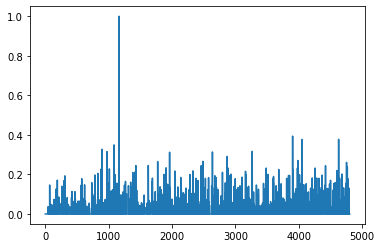

In [ ]:
plt.plot(scores)

In [ ]:
(-scores).argsort()

array([1164, 3902, 4628, ..., 1714, 1720, 4802])

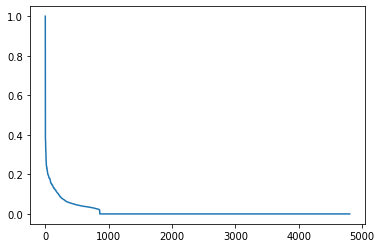

In [ ]:
plt.plot(scores[(-scores).argsort()])

In [ ]:
# get top 5 matches exvluding self
recommended = (-scores).argsort()[1:6]
recommended

array([3902, 4628, 4053, 4048, 1084])

In [ ]:
# Convert indices back to titles
titles = df['title'].iloc[recommended]
titles

3902    Friday the 13th Part VI: Jason Lives
4628                          Graduation Day
4053        Friday the 13th: A New Beginning
4048                             The Calling
1084                         The Glimmer Man
Name: title, dtype: object

In [ ]:
# Create a function that generates recommendations
def recommend(title):
  idx = movie2index[title]
  if type(idx) == pd.Series:
    idx = idx.iloc[0]

    # Get pairwaise similarity
    query = X[idx]
    scores = cosine_similarity(query,X)
    scores = scores.flatten()
    # Get indices of top matches
    recommended_indices = (-scores).argsort()[1:6]
    # Return the titles from the indices
    title = df['title'].iloc[recommended_indices]
    return title

In [ ]:
print("Recommendations for 'Top Gun':")
print(recommend('Top Gun'))

Recommendations for 'Top Gun':
None


In [ ]:
print("Recommendations for 'Pretty Woman':")
print(recommend('Pretty Woman'))

Recommendations for 'Pretty Woman':
None


In [ ]:
print("Recommendations for 'Batman':")
print(recommend('Batman'))

Recommendations for 'Batman':
210                        Batman & Robin
428                        Batman Returns
9      Batman v Superman: Dawn of Justice
65                        The Dark Knight
299                        Batman Forever
Name: title, dtype: object


In [ ]:
# Word to index mapping

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
current_idx = 0
word2idx = {}
for doc in df['string']:
  tokens = word_tokenize(doc)
  for token in tokens:
    if token not in word2idx:
      word2idx[token] = current_idx
      current_idx = current_idx + 1

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
word2idx

{'Action': 0,
 'Adventure': 1,
 'Fantasy': 2,
 'ScienceFiction': 3,
 'cultureclash': 4,
 'future': 5,
 'spacewar': 6,
 'spacecolony': 7,
 'society': 8,
 'spacetravel': 9,
 'futuristic': 10,
 'romance': 11,
 'space': 12,
 'alien': 13,
 'tribe': 14,
 'alienplanet': 15,
 'cgi': 16,
 'marine': 17,
 'soldier': 18,
 'battle': 19,
 'loveaffair': 20,
 'antiwar': 21,
 'powerrelations': 22,
 'mindandsoul': 23,
 '3d': 24,
 'ocean': 25,
 'drugabuse': 26,
 'exoticisland': 27,
 'eastindiatradingcompany': 28,
 "loveofone'slife": 29,
 'traitor': 30,
 'shipwreck': 31,
 'strongwoman': 32,
 'ship': 33,
 'alliance': 34,
 'calypso': 35,
 'afterlife': 36,
 'fighter': 37,
 'pirate': 38,
 'swashbuckler': 39,
 'aftercreditsstinger': 40,
 'Crime': 41,
 'spy': 42,
 'basedonnovel': 43,
 'secretagent': 44,
 'sequel': 45,
 'mi6': 46,
 'britishsecretservice': 47,
 'unitedkingdom': 48,
 'Drama': 49,
 'Thriller': 50,
 'dccomics': 51,
 'crimefighter': 52,
 'terrorist': 53,
 'secretidentity': 54,
 'burglar': 55,
 'hosta